In [1]:
import matplotlib.pyplot as plt
import PIL
import cv2
import os
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url,cache_dir='.',untar=True) # untar is used to unzip a zip file

In [3]:
data_dir = r"C:\Users\DeveshNarain\deep_learning_codebasics\datasets\flower_photos"

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir) # converts images into windows path object
data_dir

WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos')

In [5]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/DeveshNarain/d

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob("roses/*.jpg"))
roses[:5]

[WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

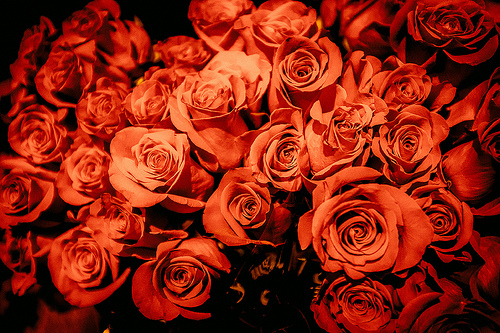

In [8]:
PIL.Image.open(str(roses[2]))

In [9]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]

[WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

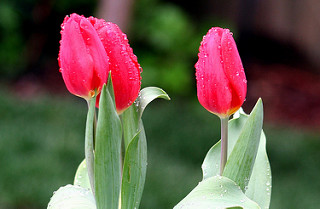

In [10]:
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flower_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [13]:
flowers_images_dict['daisy'][1]

WindowsPath('C:/Users/DeveshNarain/deep_learning_codebasics/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg')

In [14]:
str(flowers_images_dict['daisy'][1])

'C:\\Users\\DeveshNarain\\deep_learning_codebasics\\datasets\\flower_photos\\daisy\\10140303196_b88d3d6cec.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
# cv2 does not accept window path, it requires str path

In [16]:
img
# cv2 is used to convert the flowers images in path into numpy array

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img,(180,180)).shape
# resize the images to some standard size as each image is of different size 

(180, 180, 3)

In [19]:
X,y = [],[]
for flower_name,images in flowers_images_dict.items():
    for img in images:
        img = cv2.imread(str(img))
        img = cv2.resize(img,(180,180))
        X.append(img)
        y.append(flower_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
# scaling images
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [ ]:
# building convolutional neural network
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5) # no. of labels=5, as there is no activation therefore by default it will be linear
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.3642 - loss: 1.4405
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 290ms/step - accuracy: 0.5972 - loss: 1.0324
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.7085 - loss: 0.7879
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 279ms/step - accuracy: 0.7718 - loss: 0.6106
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.8562 - loss: 0.4058
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 268ms/step - accuracy: 0.9328 - loss: 0.2100
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 266ms/step - accuracy: 0.9567 - loss: 0.1370
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 269ms/step - accuracy: 0.9846 - loss: 0.0618
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 282ms/step - accuracy: 0.9957 - loss: 0.0299
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 267ms/step - accuracy: 0.9956 - loss: 0.0220
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.9772 - loss: 0.0705
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22

In [24]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.6487 - loss: 3.0434


[2.9861390590667725, 0.6535947918891907]

In [25]:
predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step


array([[ 13.9981    ,  -5.0946407 ,   0.7070797 ,  -2.449193  ,
          2.0705364 ],
       [  2.392393  , -13.932657  ,   5.186519  ,  19.916367  ,
          3.5722737 ],
       [ -2.6269433 ,  -5.043103  ,  -5.719346  ,  -0.05328161,
          1.8794668 ],
       ...,
       [ -5.449205  ,  -9.337746  ,  -7.6673336 ,  25.753597  ,
         -1.6126851 ],
       [ -3.5157125 , -25.605639  ,  10.4317255 ,  30.36312   ,
         15.119549  ],
       [ -2.2613277 ,  13.428073  , -18.513609  ,   8.289591  ,
          0.75127727]], dtype=float32)

In [33]:
score = tf.nn.softmax(predictions[5])
score # convert the result to get probability of each label which we do not get in the above step as we used linear activation function by default

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6871124e-09, 2.3517134e-03, 3.8549989e-01, 6.1214834e-01,
       5.0291306e-11], dtype=float32)>

In [34]:
np.argmax(score)

3

In [35]:
y_test[5]

3

# improve test accuracy by data augmentation

In [36]:
data_aug = keras.Sequential([
    layers.RandomFlip('horizontal',input_shape=(180,18,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\DeveshNarain\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


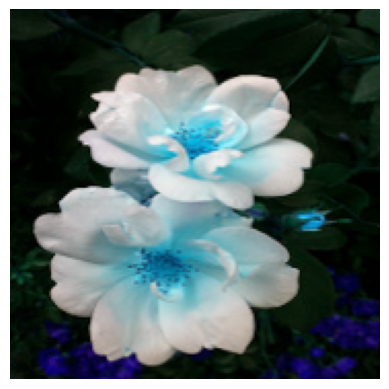

In [37]:
plt.axis('off')
plt.imshow(X[0])

In [40]:
# building convolutional neural network
model = Sequential([
    data_aug,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5) # no. of labels=5, as there is no activation therefore by default it will be linear
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=30)

MemoryError: Unable to allocate 1020. MiB for an array with shape (2752, 180, 180, 3) and data type float32